<a href="https://colab.research.google.com/github/tomersk/python-applications/blob/main/05_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 Soil moisture modelling

## 5.1 Soil hydraulic relationships
Before we jump into the soil moisture modelling, let us understand how soil moisture moves. Soil moisture does not move due to the gradient of soil moisture which means it is possible that soil moisture may move against the soil moisture gradient even when other heads are same. When soil moisture is below saturation, it faces negative pressure (suction head) and the movement of water in soil (soil moisture) depends upon the gradient of suction head. Relationship between soil moisture and sucation head is called soil moisture characteristics curve. 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app


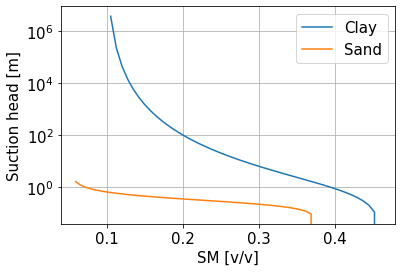

In [27]:
import numpy as np
import matplotlib.pyplot as plt

params = {'font.size': 15}
plt.rcParams.update(params)

def theta2psi(theta, thetar, thetas, m, n, alpha):
  """
  theta2psi: given the theta calculate the psi
  """
  
  Se = (theta-thetar)/(thetas-thetar)
  Se[Se<=0] = 0.0
  Se[Se>=1] = 1.0
  psi = -(1/alpha)*pow(pow(Se,-1/m)-1,1/n)
  return(psi)

#clay
thetar = 0.098
thetas = 0.459
n = 1.25
m = 1-1/n
alpha = 1.5
clay_theta = np.linspace(thetar, thetas)
clay_psi = theta2psi(clay_theta, thetar, thetas, m, n, alpha)

# sand
thetar = 0.053
thetas = 0.375
n = 3.2
m = 1-1/n
alpha = 3.5
sand_theta = np.linspace(thetar, thetas)
sand_psi = theta2psi(sand_theta, thetar, thetas, m, n, alpha)

plt.semilogy(clay_theta, -clay_psi, label="Clay")
plt.semilogy(sand_theta, -sand_psi, label="Sand")
plt.grid(True)
plt.legend(loc='best')
plt.xlabel("SM [v/v]")
plt.ylabel("Suction head [m]")
plt.show()


We can see that for each value of SM, Clay has higher suction head (lower pressure head), which means for a similar value of soil moisture (e.g. 0.2), if clay and sandy soil are kepth together, water will flow from clay to sandy soil, provided other heads are same. 

Sandy soil has relatively larger particle size, hence relatively smaller surface area which means it can hold relatively lower amount of water. So for same such head, sandy soil holds less amount of water. 

Other thing to note from SMC is that, when SM is near to saturation, suction heads remains nearly same. This is due to capillary fring. Paramter $\alpha$ is the inverse of capillary fringe thickness. We know that for clay, capillary fringe thickness is relatively higher, henc it has relatively lower value of $\alpha$. 


Let us now see how hydraulic conductivity changes with the change in soil moisture (or suction head). 

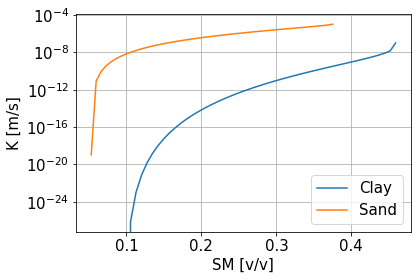

In [28]:
def theta2kr(theta, thetar, thetas, m, l, Ks):
  """
  theta2kr: given the theta, calculate the kr 
  """
  Se = (theta-thetar)/(thetas-thetar)
  Se[Se<=0] = 1e-4
  Se[Se>=1] = 1.0
  kr = Ks*(pow(Se,l))*pow(1-pow(1-pow(Se,1/m),m),2)

  return(kr)

#clay
thetar = 0.098
thetas = 0.459
n = 1.25
m = 1-1/n
alpha = 1.5
Ks = 1E-7
l = 0.5
clay_theta = np.linspace(thetar, thetas)
clay_kr = theta2kr(clay_theta, thetar, thetas, m, l, Ks)

# sand
thetar = 0.053
thetas = 0.375
n = 3.2
m = 1-1/n
alpha = 3.5
Ks = 1E-5
l = 0.5
sand_theta = np.linspace(thetar, thetas)
sand_kr = theta2kr(sand_theta, thetar, thetas, m, l, Ks)


plt.semilogy(clay_theta, clay_kr, label="Clay")
plt.semilogy(sand_theta, sand_kr, label="Sand")
plt.grid(True)
plt.legend(loc='best')
plt.xlabel("SM [v/v]")
plt.ylabel("K [m/s]")
plt.show()

At saturation, sandy soil has relatively higher $K$ compared to the clay soil. The decrease in the $K$ is relatively higher as SM decreases. At a SM of 0.2, Clay has hydraulic conductivvity of about 1E-14 m/s which means practically there is no movement of water. Hence, it is difficult to find, clay having SM around 0.2. 

It shuld be noted that above parameters are approximate parameters and in reality there might be significant variation. However, conclusions about comparing sand and clay still holds true. 